# **Qutip qubit-oscillator**

## **Instalasi QuTip**

In [1]:
from qutip import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

## **Lowest ten energy levels in the case of a high-frequency oscillator**

### **Variasi $\theta = 0$**

In [3]:
# Menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 30               #jumlah n medan
use_rwa = False
g_list = np.linspace(0, 2.5, 101)*2*np.pi # Kuat interaksi

# Operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

# Hamiltonian
Ho = wc * a.dag() * a     #osilator
Hq = 0.5 * wa* (-np.sin(0)*sx1 + np.cos(0)*sz1)/10    #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

# Menghitung Hamiltonian
psi_list = []
E_list = []
for g in g_list:
    # Hamiltonian total
    H = Ho + Hq + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # Menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.eigenstates() 
    psi_list.append(eigen_state)
    E_list.append(eigen_energy/(2*np.pi))
 
# List energi berdasar tingkat eksitasi
E_level = []
for i in range(0,10):
    E = [item[i] for item in E_list]
    E_level.append(E)
    i +=1

###  **Variasi $\theta = \pi/6$**

In [4]:
# Hamiltonian
Ho = wc * a.dag() * a     #osilator
Hq2 = 0.5 * wa* (np.sin(np.pi/6)*sx1 + np.cos(np.pi/6)*sz1)/10      #qubit


# Menghitung Hamiltonian
psi_list2 = []
E_list2 = []
for g in g_list:
    # Hamiltonian total
    H2 = Ho + Hq2 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # Menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H2.eigenstates() 
    psi_list.append(eigen_state)
    E_list2.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level2 = []
for i in range(0,10):
    E = [item[i] for item in E_list2]
    E_level2.append(E)
    i +=1

### **Variasi $\theta = \pi/3$**

In [5]:
# Hamiltonian
Ho = wc * a.dag() * a     #osilator
Hq3 = 0.5 * wa* (np.sin(np.pi/3)*sx1 + np.cos(np.pi/3)*sz1)/10     # qubit


# Menghitung Hamiltonian
psi_list3 = []
E_list3 = []
for g in g_list:
    # Hamiltonian total
    H3 = Ho + Hq3 + g * H1
    # H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
       
    # Menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H3.eigenstates() 
    psi_list.append(eigen_state)
    E_list3.append(eigen_energy/(2*np.pi))

# List energi berdasar tingkat eksitasi
E_level3 = []
for i in range(0,10):
    E = [item[i] for item in E_list3]
    E_level3.append(E)
    i +=1

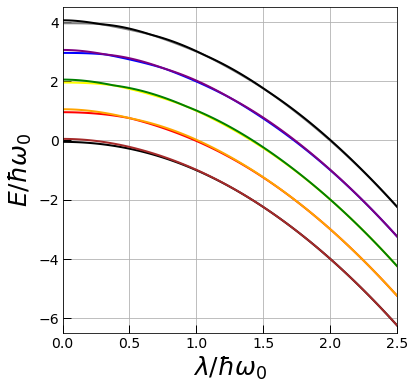

In [6]:
# Memplot nilai energi
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6,6))
 
b = ['black', 'brown', 'red','orange', 'yellow', 'green', 'blue', 'purple', 'grey',  'black']
for a in range (0,10):
    axes.plot(g_list/(2*np.pi), E_level[a], b[a], linewidth=2)
    a += 1

axes.set(xlim=(0, 2.5), ylim=(-6.5, 4.5))
axes.set_ylabel(r"$E / \hbar\omega_{0}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)
axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

## **The rescaled energy separation**

### **List Variasi Energi dengan $\theta =0$**

In [7]:
# Merubah input energi (variasi theta = 0)
E1 = E_level[1]
E0 = E_level[0]
E1E0 = []
for i in range(len(E1)):
    E1E0.append(10*(E1[i]-E0[i]))

# Merubah input energi (variasi theta = 0)
E3 = E_level[3]
E2 = E_level[2]
E3E2 = []
for i in range(len(E3)):
    E3E2.append(10*(E3[i]-E2[i])) 

# Merubah input energi (variasi theta = 0)
E5 = E_level[5]
E4 = E_level[4]
E5E4 = []
for i in range(len(E5)):
    E5E4.append(10*(E5[i]-E4[i])) 

# Merubah input energi (variasi theta = 0)
E7 = E_level[7]
E6 = E_level[6]
E7E6 = []
for i in range(len(E7)):
    E7E6.append(10*(E7[i]-E6[i])) 


### **List Variasi Energi dengan $\theta = \pi/6$**

In [8]:
# Merubah input energi (variasi theta = pi/6)
E1_2 = E_level2[1]
E0_2 = E_level2[0]
E1E0_2 = []
for i in range(len(E1_2)):
    E1E0_2.append(10*(E1_2[i]-E0_2[i]))

# Merubah input energi (variasi theta = pi/6)
E3_2 = E_level2[3]
E2_2 = E_level2[2]
E3E2_2 = []
for i in range(len(E3_2)):
    E3E2_2.append(10*(E3_2[i]-E2_2[i])) 

# Merubah input energi (variasi theta = pi/6)
E5_2 = E_level2[5]
E4_2 = E_level2[4]
E5E4_2 = []
for i in range(len(E5_2)):
    E5E4_2.append(10*(E5_2[i]-E4_2[i])) 

# Merubah input energi (variasi theta = pi/6)
E7_2 = E_level2[7]
E6_2 = E_level2[6]
E7E6_2 = []
for i in range(len(E7_2)):
    E7E6_2.append(10*(E7_2[i]-E6_2[i])) 


### **List Variasi Energi dengan $\theta = \pi/3$**

In [9]:
# Merubah input energi (variasi theta = pi/3)
E1_3 = E_level3[1]
E0_3 = E_level3[0]
E1E0_3 = []
for i in range(len(E1_3)):
    E1E0_3.append(10*(E1_3[i]-E0_3[i]))

# Merubah input energi (variasi theta = pi/3)
E3_3 = E_level3[3]
E2_3 = E_level3[2]
E3E2_3 = []
for i in range(len(E3_3)):
    E3E2_3.append(10*(E3_3[i]-E2_3[i])) 

# Merubah input energi (variasi theta = pi/3)
E5_3 = E_level3[5]
E4_3 = E_level3[4]
E5E4_3 = []
for i in range(len(E5_3)):
    E5E4_3.append(10*(E5_3[i]-E4_3[i])) 

# Merubah input energi (variasi theta = pi/3)
E7_3 = E_level3[7]
E6_3 = E_level3[6]
E7E6_3 = []
for i in range(len(E7_3)):
    E7E6_3.append(10*(E7_3[i]-E6_3[i])) 


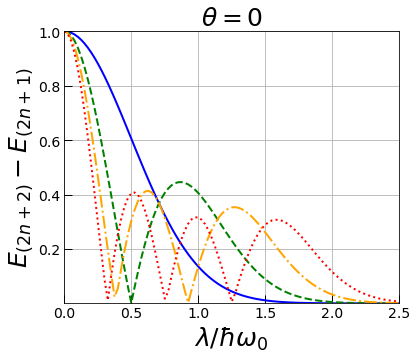

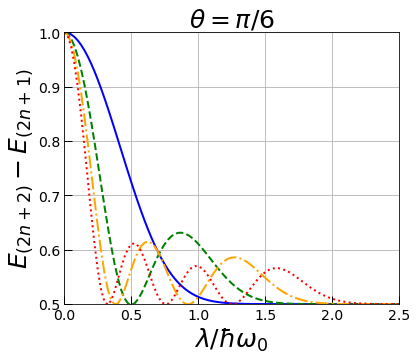

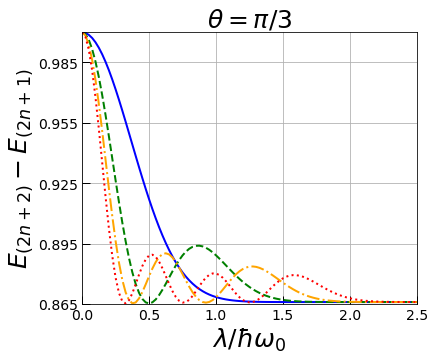

In [11]:
# Memplot nilai energi theta = 0
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), E1E0, 'blue', linewidth=2)
axes.plot(g_list/(2*np.pi), E3E2, 'green', linewidth=2, linestyle='dashed')
axes.plot(g_list/(2*np.pi), E5E4, 'orange', linewidth=2, linestyle='-.')
axes.plot(g_list/(2*np.pi), E7E6, 'red', linewidth=2, linestyle='dotted')

axes.set(xlim=(0, 2.5), ylim=(0.001, 1))
axes.set_title(r"$\theta = 0$", fontsize=25)
axes.set_ylabel(r"$E_{(2n+2)} - E_{(2n+1)}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

# Memplot nilai energi theta = pi/6
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), E1E0_2, 'blue', linewidth=2)
axes.plot(g_list/(2*np.pi), E3E2_2, 'green', linewidth=2, linestyle='dashed')
axes.plot(g_list/(2*np.pi), E5E4_2, 'orange', linewidth=2, linestyle='-.')
axes.plot(g_list/(2*np.pi), E7E6_2, 'red', linewidth=2, linestyle='dotted')

axes.set(xlim=(0, 2.5), ylim=(0.5, 1))
axes.set_title(r"$\theta = \pi/6$", fontsize=25)
axes.set_ylabel(r"$E_{(2n+2)} - E_{(2n+1)}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()

# Memplot nilai energi theta = pi/3
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(6, 5))

axes.plot(g_list/(2*np.pi), E1E0_3, 'blue', linewidth=2)
axes.plot(g_list/(2*np.pi), E3E2_3, 'green', linewidth=2, linestyle='dashed')
axes.plot(g_list/(2*np.pi), E5E4_3, 'orange', linewidth=2, linestyle='-.')
axes.plot(g_list/(2*np.pi), E7E6_3, 'red', linewidth=2, linestyle='dotted')

axes.set(xlim=(0, 2.5), ylim=(0.865, 1))
axes.set_title(r"$\theta = \pi/3$", fontsize=25)
axes.set_yticks(np.arange(0.865, 1, 0.03))
axes.set_ylabel(r"$E_{(2n+2)} - E_{(2n+1)}$", fontsize=25)
axes.set_xlabel(r"$\lambda / \hbar\omega_{0}$", fontsize=25)

axes.tick_params(axis="x", direction="in", length=8, width=1, labelsize=14)
axes.tick_params(axis="y", direction="in", length=8, width=1, labelsize=14)
axes.grid()